Processing robot 2 ...Processing robot 1 ...Processing robot 3 ...Processing robot 4 ...



Finished robot 3
Finished robot 2
Finished robot 4
Finished robot 1
✅ All robots processed.
============= Generation 1 =============
Processing robot 1 ...Processing robot 2 ...Processing robot 3 ...Processing robot 4 ...



Finished robot 3
Finished robot 4
Finished robot 1
Finished robot 2
✅ All robots processed.
Best one is 0.014740198964303312


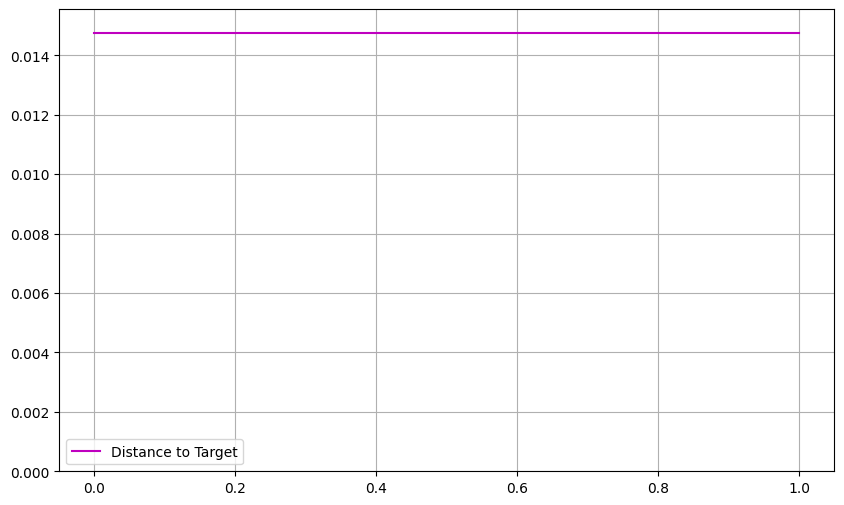

In [1]:
from neuro_evolution_body import main
import matplotlib.pyplot as plt
import mujoco
import numpy as np
from mujoco import viewer
from ariel.body_phenotypes.robogen_lite.prebuilt_robots.gecko import gecko
from ariel.simulation.environments.simple_flat_world import SimpleFlatWorld



import sys, os, contextlib

@contextlib.contextmanager
def suppress_all_output_c():
    """Suppress everything printed to stdout and stderr, including C-level warnings."""
    devnull = os.open(os.devnull, os.O_WRONLY)
    # Save original stdout/stderr
    old_stdout = os.dup(1)
    old_stderr = os.dup(2)
    # Redirect to /dev/null
    os.dup2(devnull, 1)
    os.dup2(devnull, 2)
    try:
        yield
    finally:
        # Restore original stdout/stderr
        os.dup2(old_stdout, 1)
        os.dup2(old_stderr, 2)
        os.close(devnull)
        os.close(old_stdout)
        os.close(old_stderr)



with suppress_all_output_c():
    x, a = None, None
    if __name__ == "__main__":
        x, a = main(n_population=4, generations=1, p_crossover=0.5, m_rate=0.1)
        plt.figure(figsize=(10, 6))
        plt.plot(a, 'm-', label='Distance to Target')
        plt.ylim(bottom = 0)
        plt.legend()
        plt.grid(True)

In [ ]:
# import random
# if __name__ == "__main__":
#     runs = 2
#     generations = 30
#     all_best = []

#     for r in range(runs):
#         # (optioneel) reproduceerbaar maken
#         seed = 1234 + r
#         np.random.seed(seed)
#         random.seed(seed)

#         _, f_best = main(time=30, population=10, generations=generations)
#         all_best.append(np.asarray(f_best, dtype=float))

#     # Lengtes gelijk trekken (voor de zekerheid)
#     min_len = min(len(b) for b in all_best)
#     A = np.vstack([b[:min_len] for b in all_best])   # shape: (runs, min_len)

#     mean = A.mean(axis=0)
#     std  = A.std(axis=0, ddof=1)                     # sample std
#     gens = np.arange(min_len)                        # of np.arange(1, min_len+1)

#     plt.figure(figsize=(10, 6))
#     plt.plot(gens, mean, 'm-', label='Mean best per generation')
#     plt.fill_between(gens, mean - std, mean + std, alpha=0.2, label='±1 SD')
#     plt.xlabel('Generation')
#     plt.ylabel('Distance to goal (lower is better)')
#     plt.ylim(bottom=0)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [ ]:
from pathlib import Path
from networkx import DiGraph
from networkx.readwrite import json_graph
import json

def load_graph_from_json(
    load_file: Path | str,EvoAI
) -> DiGraph:
    with Path(load_file).open("r", encoding="utf-8") as f:
        data = json.load(f)

    graph = json_graph.node_link_graph(data, edges="edges", directed=True)
    return graph

In [ ]:
from ariel.body_phenotypes.robogen_lite.constructor import (
    construct_mjspec_from_graph,
)
from ariel.simulation.environments.simple_flat_world import SimpleFlatWorld
from neuro_evolution_body import DATA
from neuro_evolution_controller import nn_control

mujoco.set_mjcb_control(None) # DO NOT REMOVE
world = SimpleFlatWorld()
gecko_core= gecko()

world.spawn(gecko_core.spec, spawn_position=[0, 0, 0])
model = world.spec.compile()
data = mujoco.MjData(model) # type: ignore
geoms = world.spec.worldbody.find_all(mujoco.mjtObj.mjOBJ_GEOM)
to_track = [data.bind(geom) for geom in geoms if "core" in geom.name]

input_size  = len(data.qvel)  # e.g., 6 positions + 6 velocities
hidden_size = 16
output_size = model.nu
history = []

mujoco.set_mjcb_control(lambda m,d: nn_control(m, d, to_track, np.array(x[-1]), history, input_size, hidden_size, output_size))

viewer.launch(
    model=model,  # type: ignore
    data=data,
)